In [1]:
# Hate speech is an unfortunately common occurrence on the Internet. 
# Often social media sites like Facebook and Twitter face the problem of identifying and censoring problematic 
# posts while weighing the right to freedom of speech. The importance of detecting and moderating hate speech is
# evident from the strong connection between hate speech and actual hate crimes. Early identification of users
# promoting hate speech could enable outreach programs that attempt to prevent an escalation from speech to action. 
# Sites such as Twitter and Facebook have been seeking to actively combat hate speech. In spite of these reasons,
# NLP research on hate speech has been very limited, primarily due to the lack of a general definition of hate speech,
# an analysis of its demographic influences, and an investigation of the most effective features.

In [2]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category = DeprecationWarning)

%matplotlib inline

In [3]:
train = pd.read_csv('train_E6oV3lV.csv',engine="python")
test = pd.read_csv('test_tweets_anuFYb8.csv',engine="python")

In [4]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urÃ°ÂŸÂ“Â±!!! Ã°ÂŸÂ˜Â™Ã°ÂŸÂ˜ÂŽÃ°ÂŸÂ‘Â„Ã°ÂŸÂ‘Â…Ã°ÂŸÂ’Â¦Ã°ÂŸÂ’Â¦Ã°ÂŸÂ’Â¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢Â€Â¦
7,8,0,the next school year is the year for exams.Ã°ÂŸÂ˜Â¯ can't think about that Ã°ÂŸÂ˜Â­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers Ã¢Â€Â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,Ã°ÂŸÂ˜Â©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medÃ¢Â€Â¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsÃ¢Â€Â¦


In [6]:
train.shape


(31962, 3)

In [7]:
test.shape

(17197, 2)

In [8]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [9]:
#sexist/ racist = 2242
#non sexist/racist = 29720

#imbalanced clasification

In [10]:
#check distribution of length of the tweets, in terms ofwords in both test and train data

In [11]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

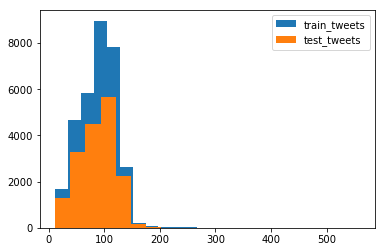

In [12]:
# plot distribution of length of tweets
plt.hist(length_train, bins= 20 ,label ="train_tweets")
plt.hist(length_test, bins = 20 , label = "test_tweets")
plt.legend()
plt.show()

In [13]:
# While making train and test split one most important assumption 
# we make is that samples from both training and testing set should come from the same distribution. 
# To build a well-performing machine learning (ML) model, it is essential to train the model on 
# and test it against data that come from the same target distribution.

In [14]:
# Next 
# 1. cleaning raw text to remove unwanted character and words.
# 2. combine the test and train data to preprocess the data.


In [15]:
combine_data = train.append(test,ignore_index=True)
combine_data.shape

(49159, 3)

In [16]:
# Removing  twitter handles(@ users)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

combine_data["tidy_tweet"] = np.vectorize(remove_pattern)(combine_data['tweet'],"@[\w]*")

In [17]:
# Removing punctuations,numbers and special characters

combine_data["tidy_tweet"]=combine_data['tweet'].str.replace("[^a-zA-Z#]"," ")
combine_data.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urÃ°ÂŸÂ“Â±!!! Ã°ÂŸÂ˜Â™Ã°ÂŸÂ˜ÂŽÃ°ÂŸÂ‘Â„Ã°ÂŸÂ‘Â…Ã°ÂŸÂ’Â¦Ã°ÂŸÂ’Â¦Ã°ÂŸÂ’Â¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢Â€Â¦,user camping tomorrow user user user user user user user danny
7,8,0.0,the next school year is the year for exams.Ã°ÂŸÂ˜Â¯ can't think about that Ã°ÂŸÂ˜Â­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers Ã¢Â€Â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,user user welcome here i m it s so #gr


In [18]:
# Removing short words
combine_data['tidy_tweet'] = combine_data['tidy_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))
combine_data.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urÃ°ÂŸÂ“Â±!!! Ã°ÂŸÂ˜Â™Ã°ÂŸÂ˜ÂŽÃ°ÂŸÂ‘Â„Ã°ÂŸÂ‘Â…Ã°ÂŸÂ’Â¦Ã°ÂŸÂ’Â¦Ã°ÂŸÂ’Â¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢Â€Â¦,user camping tomorrow user user user user user user user danny
7,8,0.0,the next school year is the year for exams.Ã°ÂŸÂ˜Â¯ can't think about that Ã°ÂŸÂ˜Â­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers Ã¢Â€Â¦,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,user user welcome here


In [19]:
# Text Normalization
#step 1: tokenzie the tweets
tokenized_tweet =combine_data['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                      [user, when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [user, user, thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                 [bihday, your, majesty]
3                                                                        [#model, love, take, with, time]
4                                                                      [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [20]:
# step 2: normalize the text using nltk's porter stemmer function.
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [21]:
#step 3: stich token back together using nltk's Moses detokenizer

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]= " ".join(tokenized_tweet[i])
    combine_data['tidy_tweet'] = tokenized_tweet

In [22]:
#!pip install wordcloud


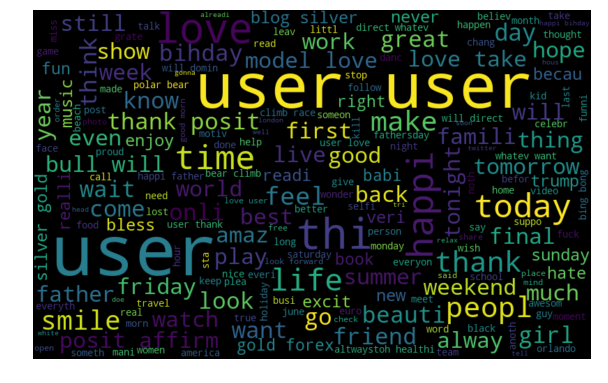

In [23]:
# Visualizing all the words using wordcloud plot

all_words = ' '.join([text for text in combine_data["tidy_tweet"]])

from wordcloud import WordCloud
wordcloud = WordCloud( width=800,height=500,random_state=21,max_font_size=100).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

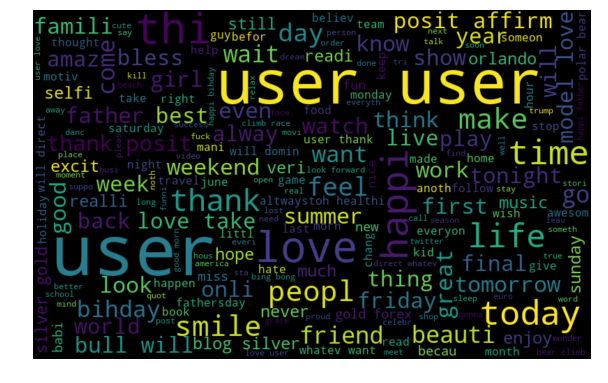

In [24]:
# words in non racist/sexist tweets

normal_words = " ".join([text for text in combine_data['tidy_tweet'][combine_data['label'] == 0]])
wordcloud = WordCloud( width=800,height=500,random_state=21,max_font_size=100).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

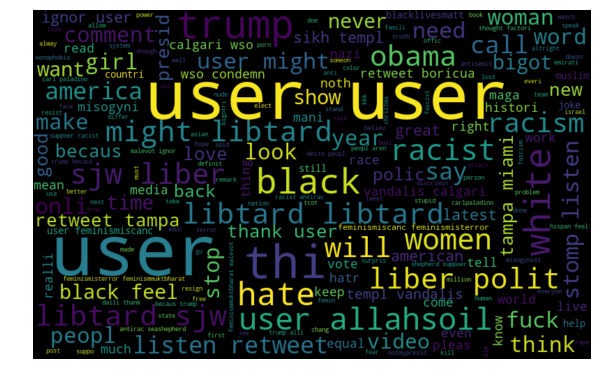

In [25]:
# words in racist/sexist tweets 
negative_words = " ".join([text for text in combine_data['tidy_tweet'][combine_data['label'] == 1]])
wordcloud = WordCloud( width=800,height=500,random_state=21,max_font_size=100).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
# function to collect hashtags 
def hashtag_extract(x):
    hashtags = []
    # loop over the words in the tweet 
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [27]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combine_data['tidy_tweet'][combine_data['label']==0])

# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combine_data['tidy_tweet'][combine_data['label']==1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])


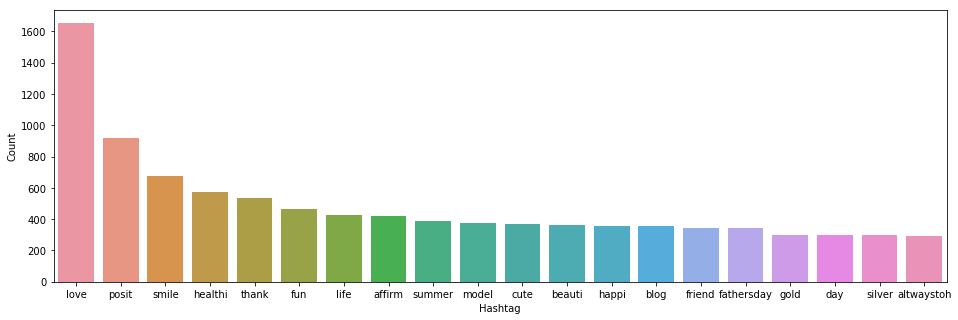

In [28]:
# plot the top n hashtags in the non racist/sexist tweets

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count':list(a.values())})
# selecting top 20 most frequent hashtags

d= d.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d,x="Hashtag",y="Count")
ax.set(ylabel ='Count')
plt.show()

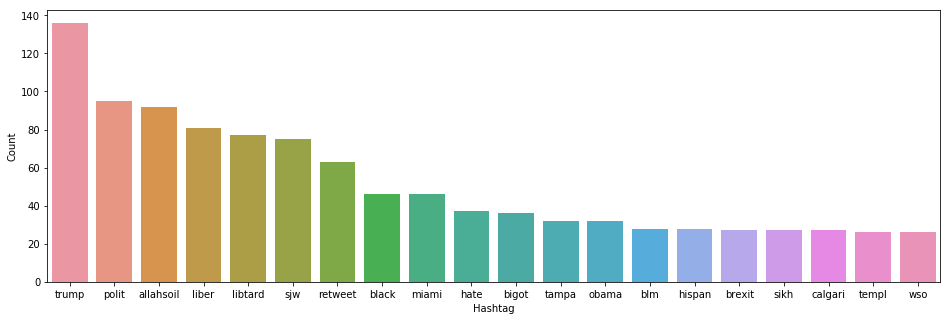

In [29]:
# plot the top n hashtags in the non racist/sexist tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),'Count':list(b.values())})
# selecting top 20 most frequent hashtags

e = e.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data = e,x="Hashtag",y="Count")
ax.set(ylabel ='Count')
plt.show()

In [30]:
#pip install scikit-learn

In [31]:
# import nltk
# import sklearn

# print('The nltk version is {}.'.format(nltk.__version__))
# print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [32]:
#from sklearn.feature_extraction.text import TfidVectorizer,CountVectorizer
#from sklearn.feature_extraction.text import TfidVectorizer,CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim

bow_vectorizer = CountVectorizer(max_df = 0.90,min_df =2 , max_features = 1000, stop_words ='english')
bow = bow_vectorizer.fit_transform(combine_data['tidy_tweet'])
bow.shape

(49159, 1000)

In [34]:

tfid_vectorizer = TfidfVectorizer(max_df = 0.90,min_df =2 , max_features = 1000, stop_words ='english')
tfid = tfid_vectorizer.fit_transform(combine_data['tidy_tweet'])
tfid.shape

(49159, 1000)

In [38]:
#Word2vec features

tokenized_tweet = combine_data['tidy_tweet'].apply(lambda x: x.split())
model_w2v = gensim.models.Word2Vec(tokenized_tweet,size=200,window=5,min_count=2,
                                   sg=1,hs=0,negative=10,workers=2,seed=34)

In [40]:
model_w2v.train(tokenized_tweet,total_examples = len(combine_data['tidy_tweet']),epochs=20)

(6618884, 8077800)

model_w2v.wv.most_similar(positive="dinner")

In [41]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.5685616731643677),
 ('cookout', 0.5551266074180603),
 ('#biall', 0.550128698348999),
 ('noodl', 0.5456160306930542),
 ('#avocado', 0.5390455722808838),
 ('dess', 0.53862065076828),
 ('lukey', 0.5341360569000244),
 ('#cellar', 0.5323057770729065),
 ('#foodcoma', 0.5255159139633179),
 ('alfredo', 0.520520806312561)]

In [42]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5696328282356262),
 ('phoni', 0.5502136945724487),
 ('melo', 0.5472217798233032),
 ('#delegaterevolt', 0.545108437538147),
 ('unstabl', 0.5403033494949341),
 ('endors', 0.5377825498580933),
 ('nomine', 0.5375252962112427),
 ('hillari', 0.5346307754516602),
 ('businessman', 0.5330036878585815),
 ('tomlin', 0.5312021374702454)]

In [44]:
model_w2v.wv.most_similar(positive="food")

[('void', 0.5002328753471375),
 ('#raw', 0.49417844414711),
 ('#desktweet', 0.4935898184776306),
 ('obes', 0.48758894205093384),
 ('yaaaay', 0.48430535197257996),
 ('alfredo', 0.48178914189338684),
 ('#doplant', 0.4789502024650574),
 ('#nomnom', 0.47828924655914307),
 ('frenzi', 0.4766121506690979),
 ('closur', 0.475607693195343)]